In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import corner
import matplotlib
# plt.rcParams.update({'font.size': 30})
matplotlib.rcParams['text.usetex'] = True

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [8]:
fr = open("../O5_Tobs5_snr11/GW_injections_O5.p", "rb")
inj = pickle.load(fr)
fr.close()

ind = 8163
m1 = inj['injections_parameters']['m1d'][ind]
m2 = inj['injections_parameters']['m2d'][ind]
Mc = (m1*m2)**0.6 / (m1+m2)**0.2
q = m2/m1

In [4]:
with open('label_result_plot.json','r')as file:
    data = json.load(file)

In [5]:
data['posterior']['content'].keys()

dict_keys(['Mc', 'q', 'DL', 'iota', 'y', 'log_likelihood', 'log_prior'])

In [6]:
samples = np.array([data['posterior']['content']['Mc'],data['posterior']['content']['q'],np.array(data['posterior']['content']['DL'])*0.001,data['posterior']['content']['iota'],data['posterior']['content']['y']]).T
label=[r'${\cal M}_c$',r'$q$',r'$d_L^{\rm GW}$',r'$\iota$',r'$y$']
truth = [Mc, q, inj['injections_parameters']['dls'][ind]*0.001, inj['injections_parameters']['incs'][ind], 0.594]

<Figure size 640x480 with 0 Axes>

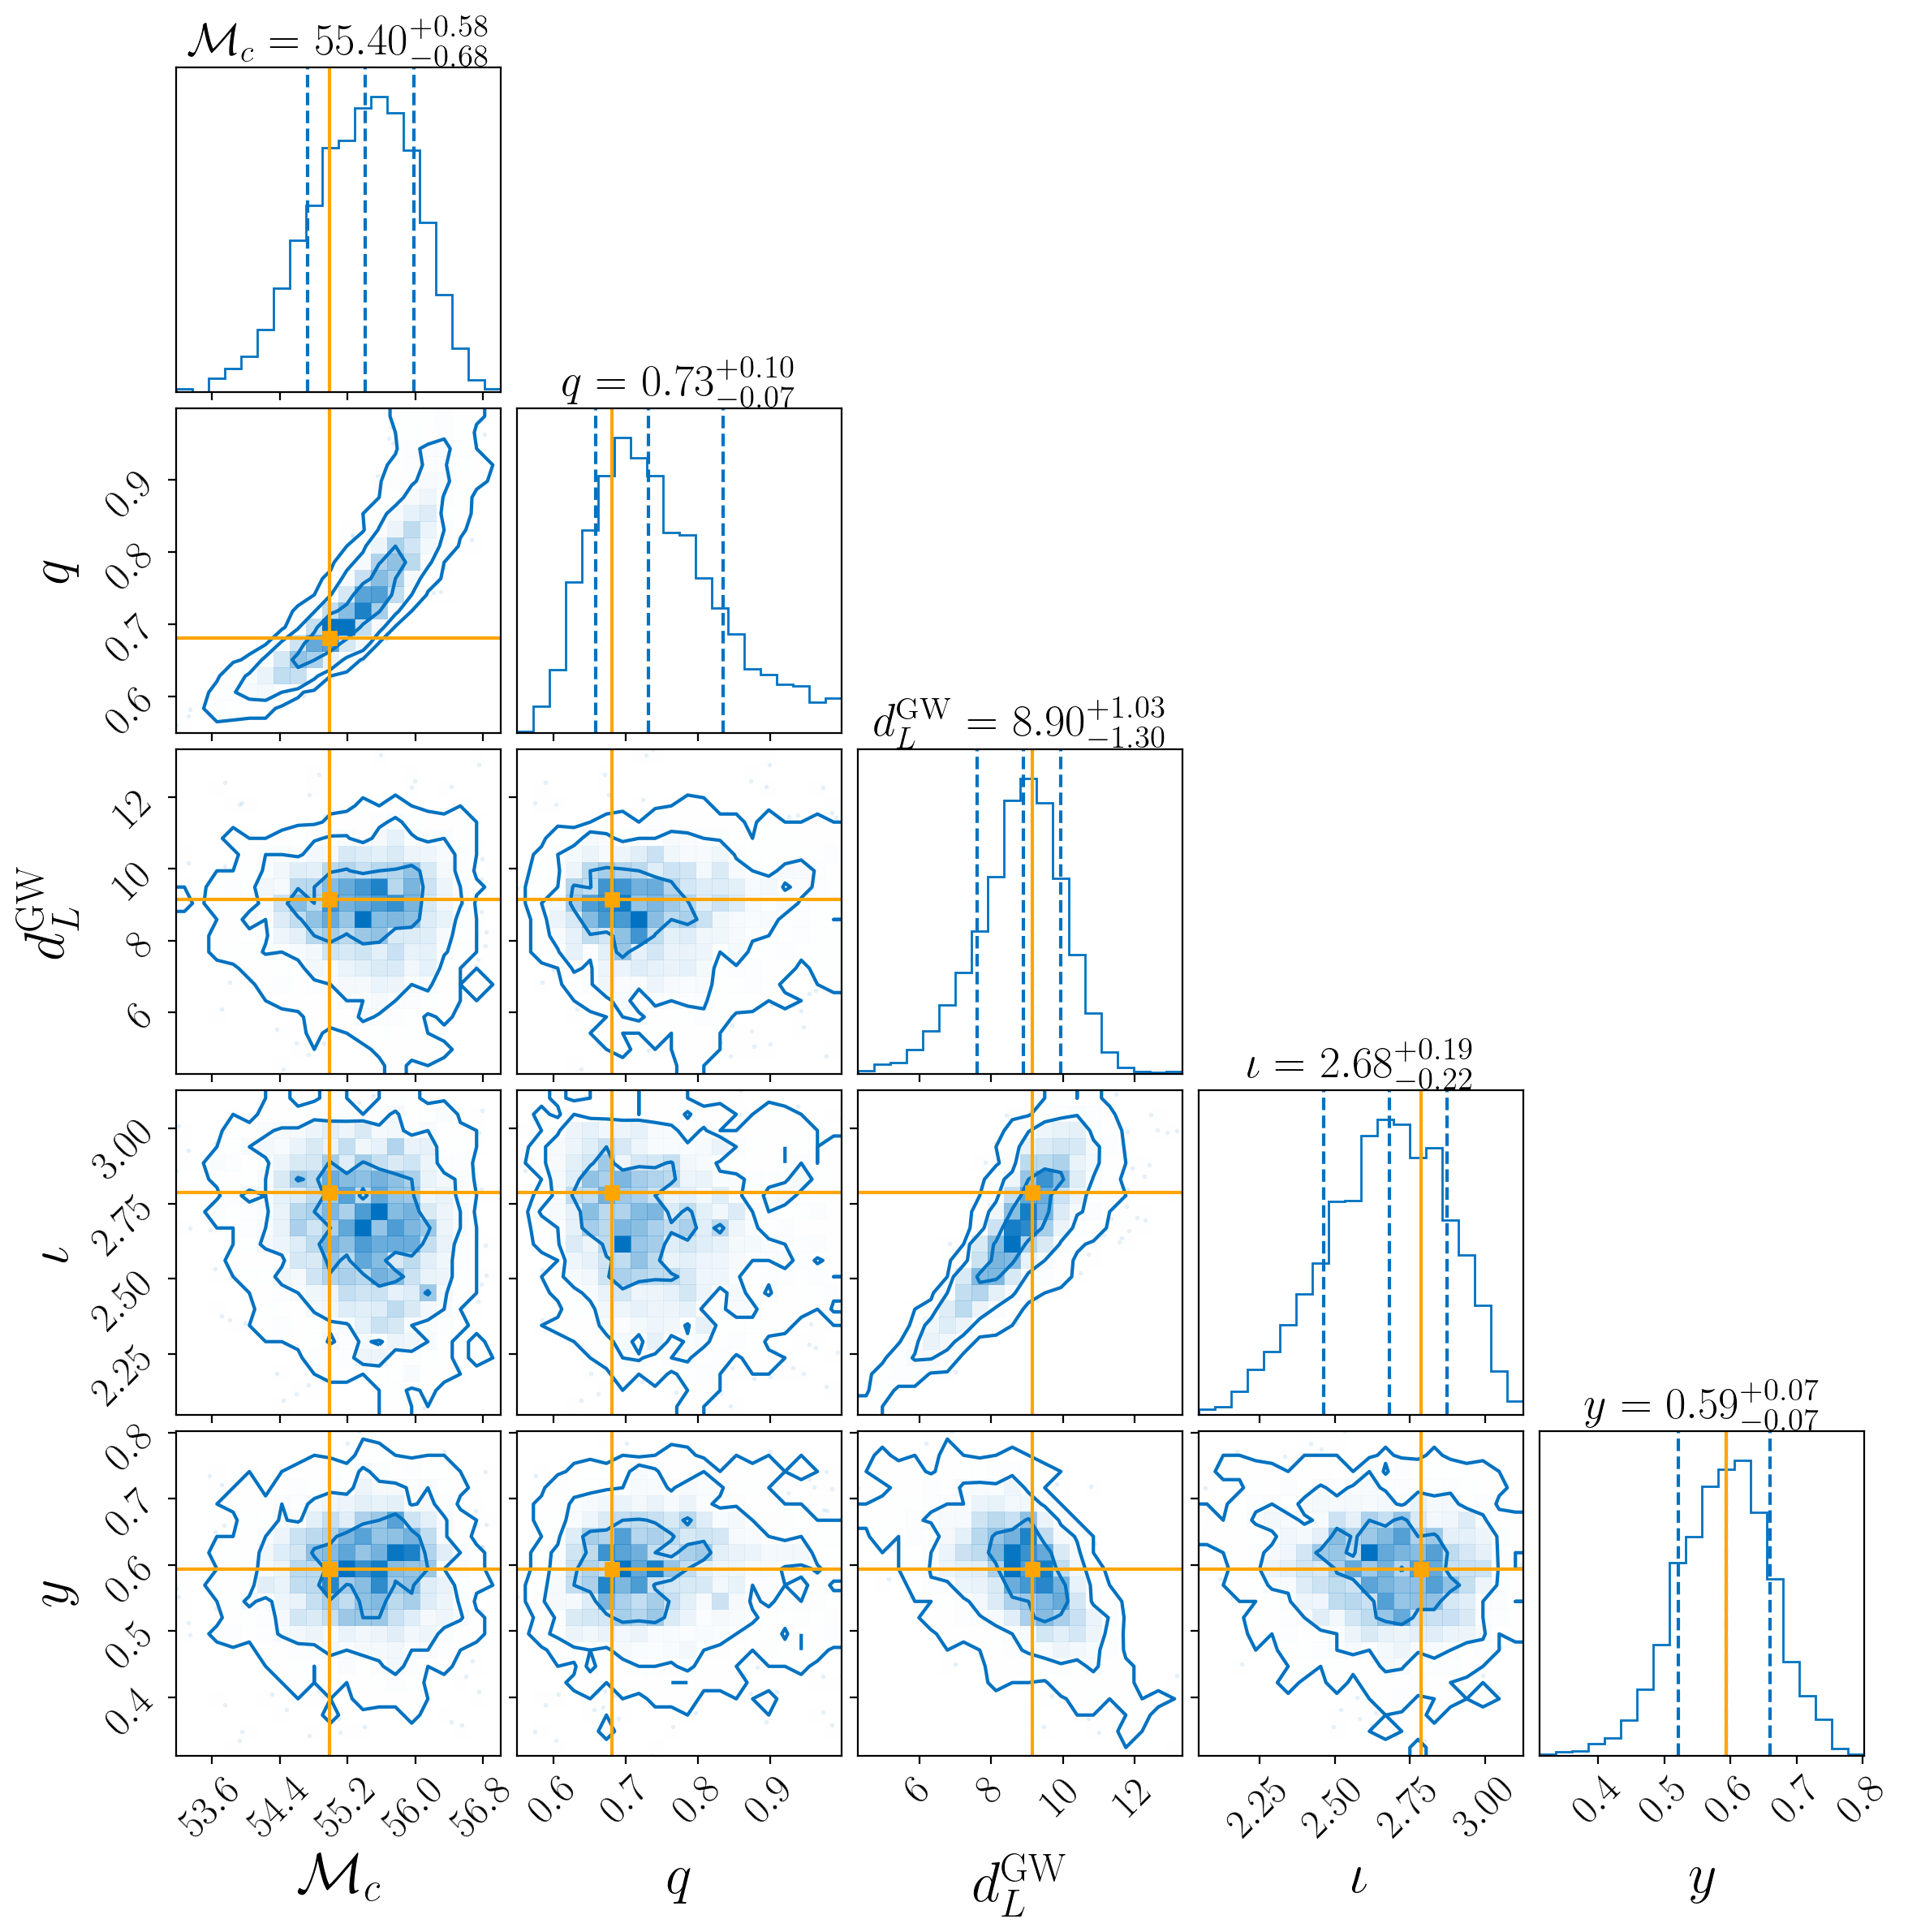

In [7]:
plt.rcParams.update({'font.size': 18})
plt.figure()
corner.corner(samples, labels=label, truths=truth, truth_color='orange', label_kwargs=dict(fontsize=25), color='#0072C1', levels=(1-np.exp(-0.5),1-np.exp(-2),1-np.exp(-4.5)), quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 20})
plt.savefig('../plots/fig_PE_O5_8163.pdf')

In [9]:
H0_arr_XG = np.linspace(50,90,200)
Om0_arr_XG = np.linspace(0.01,0.99,200)
Xi0_arr_XG = np.linspace(0.1,6,200)
n_arr_XG = np.linspace(0.,10,200)
param_values_XG = [H0_arr_XG,Om0_arr_XG,Xi0_arr_XG,n_arr_XG]


In [60]:
ind_lik_norm_avg_XG = np.loadtxt(f'average_lik_y_data/average_lik_Xi0n_1d_0_XG.txt')


In [62]:
from utils import *

con_int_XG = confidence_interval(ind_lik_norm_avg_XG, param_values_XG[0])

print(con_int_XG.lower_level,con_int_XG.upper_level)


65.67798172911175 69.23732854062347


In [79]:
from scipy.stats import gaussian_kde
Xi0_arr = np.linspace(0.1,10,1000)
ind_lik_norm_avg = 0
for i in range(100):
    emcee_samples = np.loadtxt(f'emcee_samples_y_XG/emcee_H0_Om0_Xi0n_seed_{i}_samples_y_XG.txt')

    p1d_kde = gaussian_kde(emcee_samples[:,2])
    ind_lik_norm_avg += p1d_kde(Xi0_arr) / 100


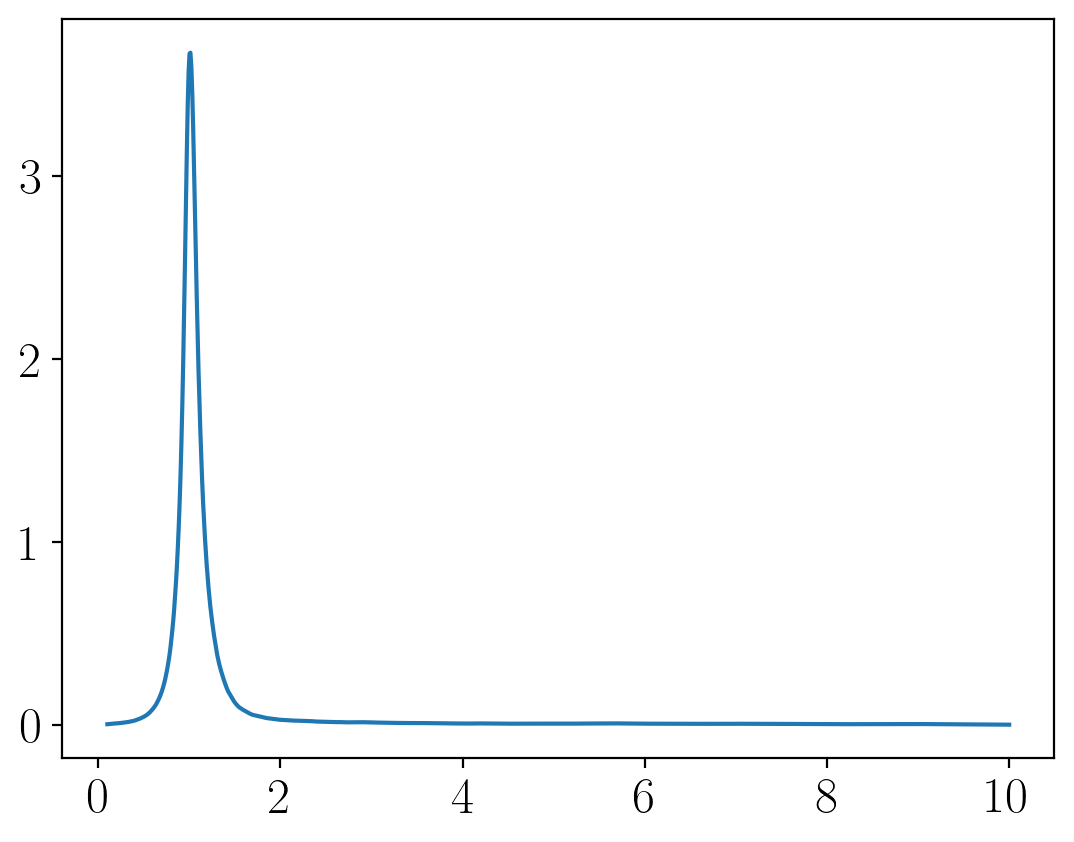

In [80]:
plt.plot(Xi0_arr, ind_lik_norm_avg)

In [81]:
con_int_XG = confidence_interval(ind_lik_norm_avg, Xi0_arr)

print(con_int_XG.lower_level,con_int_XG.upper_level)


0.8730006073852159 1.1740566743372431


In [83]:
cdfvals = cumtrapz(ind_lik_norm_avg, Xi0_arr)
# sel = cdfvals > 0.
x = Xi0_arr[1:]
# cdfvals = cdfvals[sel]
ppf = interp1d(cdfvals, x, fill_value=0., bounds_error=False)

def intervalWidth(lowTailPr):
    ret = ppf(0.683 + lowTailPr) - ppf(lowTailPr)
    if (ret > 0.):
        return ret
    else:
        return 1e4
HDI_lowTailPr = fmin(intervalWidth, 1. - 0.683, disp=False)[0]
print(ppf(HDI_lowTailPr), ppf(HDI_lowTailPr + 0.683))


0.8730006073852159 1.1740566743372431


/tmp/ipykernel_537725/1407734615.py:1: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdfvals = cumtrapz(ind_lik_norm_avg, Xi0_arr)


In [88]:
con_int_XG = confidence_interval(ind_lik_norm_avg, Xi0_arr)

print(con_int_XG.map, con_int_XG.map-con_int_XG.lower_level, con_int_XG.upper_level-con_int_XG.map)


1.0073440734407344 0.1343434660555185 0.16671260089650874


In [93]:
from scipy.stats import gaussian_kde
wa_arr = np.linspace(-5,5,200)
ind_lik_norm_avg = 0
for i in range(100):
    emcee_samples = np.loadtxt(f'emcee_samples_y_XG/emcee_H0_Om0_w0wa_seed_{i}_samples_y_XG.txt')

    p1d_kde = gaussian_kde(emcee_samples[:,3])
    ind_lik_norm_avg += p1d_kde(wa_arr) / 100


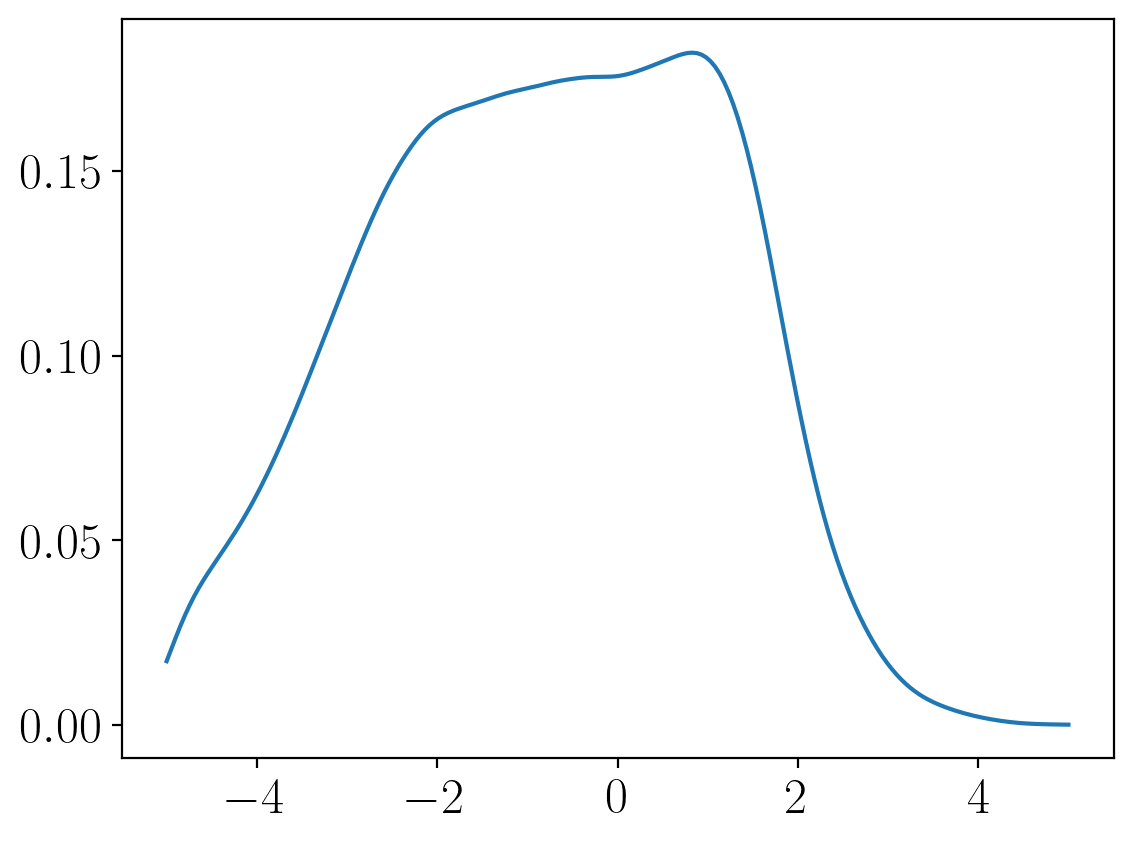

In [94]:
plt.plot(wa_arr, ind_lik_norm_avg)

In [95]:
for i in range(100):
    emcee_samples = np.loadtxt(f'emcee_samples_y_XG/emcee_H0_Om0_w0wa_seed_{i}_samples_y_XG.txt')

    p1d_kde = gaussian_kde(emcee_samples[:,3],bw_method=1.5)
    ind_lik_norm_avg += p1d_kde(wa_arr) / 100


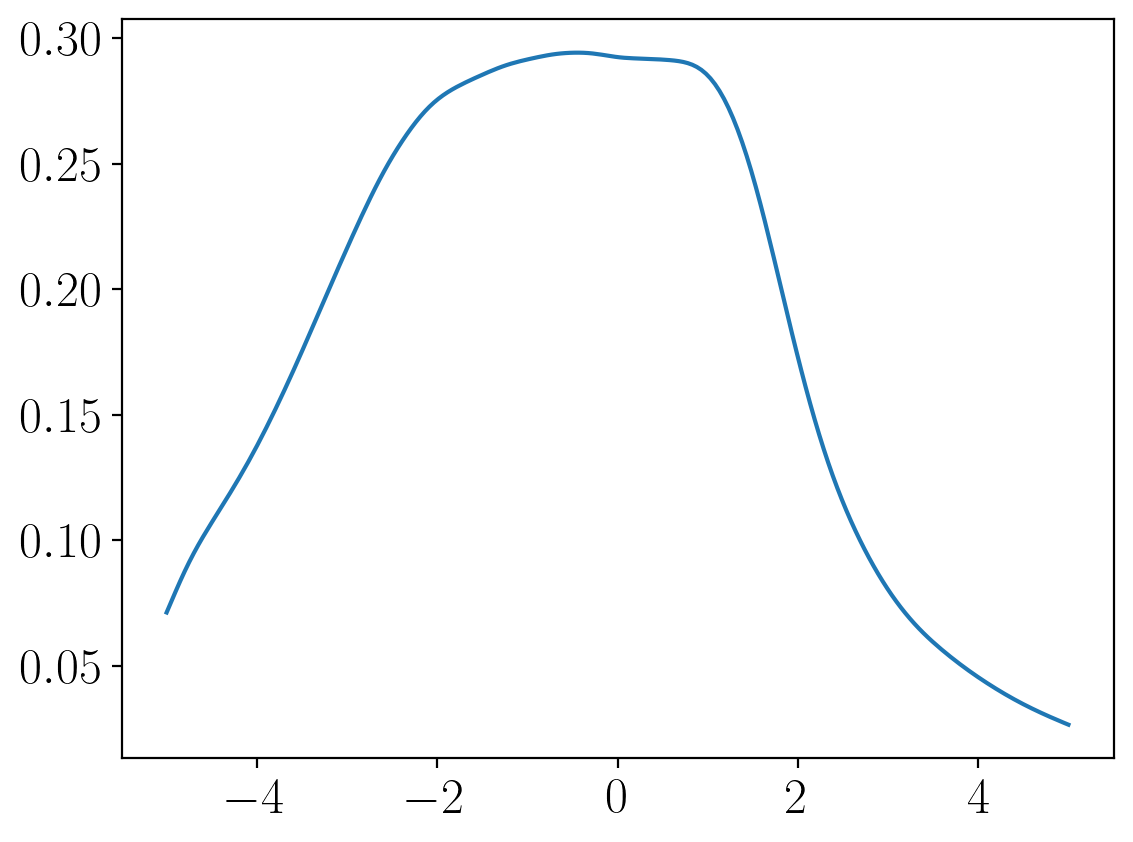

In [96]:
plt.plot(wa_arr, ind_lik_norm_avg)

In [97]:
np.savetxt(f'average_lik_y_data/average_lik_w0wa_1d_3_XG.txt',ind_lik_norm_avg)

In [98]:
9.554-10

-0.44599999999999973

In [99]:
ind_lik_norm_avg = np.loadtxt(f'average_lik_y_data/average_lik_Xi0n_1d_3.txt')
n_arr = np.linspace(0,10,100)

cdfvals = cumtrapz(ind_lik_norm_avg, n_arr)
# sel = cdfvals > 0.
x = n_arr[1:]
# cdfvals = cdfvals[sel]
ppf = interp1d(cdfvals, x, fill_value=0., bounds_error=False)

print(ppf(0), ppf(0.683))


0.0 6.463828545963637


/tmp/ipykernel_537725/2262480625.py:4: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdfvals = cumtrapz(ind_lik_norm_avg, n_arr)


In [100]:
ind_lik_norm_avg = np.loadtxt(f'average_lik_y_data/average_lik_Xi0n_1d_3_O6.txt')
n_arr = np.linspace(0,10,100)

cdfvals = cumtrapz(ind_lik_norm_avg, n_arr)
# sel = cdfvals > 0.
x = n_arr[1:]
# cdfvals = cdfvals[sel]
ppf = interp1d(cdfvals, x, fill_value=0., bounds_error=False)

print(ppf(0), ppf(0.683))


0.0 6.628878251873342


/tmp/ipykernel_537725/2997687846.py:4: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdfvals = cumtrapz(ind_lik_norm_avg, n_arr)


In [102]:
ind_lik_norm_avg = np.loadtxt(f'average_lik_y_data/average_lik_Xi0n_1d_3_XG.txt')
n_arr = np.linspace(0,10,200)

cdfvals = cumtrapz(ind_lik_norm_avg, n_arr)
# sel = cdfvals > 0.
x = n_arr[1:]
# cdfvals = cdfvals[sel]
ppf = interp1d(cdfvals, x, fill_value=0., bounds_error=False)

print(ppf(0), ppf(0.683))


0.0 6.313956091092671


/tmp/ipykernel_537725/4158222939.py:4: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cdfvals = cumtrapz(ind_lik_norm_avg, n_arr)


In [2]:
from utils import *
pH0 = np.loadtxt(f'average_lik_y_data/average_lik_1d_0.txt')
pH0_O6 = np.loadtxt(f'average_lik_y_data/average_lik_1d_0_O6.txt')
pH0_XG = np.loadtxt(f'average_lik_y_data/average_lik_1d_0_XG.txt')
pH0_XG_Om0prior = np.loadtxt(f'average_lik_y_data/average_lik_1d_0_XG_Om0prior.txt')

H0_arr = np.linspace(20,120,200)
H0_arr_XG = np.linspace(60,80,200)

con_int = confidence_interval(pH0, H0_arr)
con_int_O6 = confidence_interval(pH0_O6, H0_arr)
con_int_XG = confidence_interval(pH0_XG, H0_arr_XG)
con_int_XG_Om0prior = confidence_interval(pH0_XG_Om0prior, H0_arr_XG)


In [4]:
pH0_w0wa = np.loadtxt(f'average_lik_y_data/average_lik_w0wa_1d_0.txt')
pH0_w0wa_O6 = np.loadtxt(f'average_lik_y_data/average_lik_w0wa_1d_0_O6.txt')
pH0_w0wa_XG = np.loadtxt(f'average_lik_y_data/average_lik_w0wa_1d_0_XG.txt')
pH0_w0wa_XG_Om0prior = np.loadtxt(f'average_lik_y_data/average_lik_w0wa_1d_0_XG_Om0prior.txt')

H0_w0wa_arr = np.linspace(20,200,200)
H0_w0wa_arr_XG = np.linspace(40,120,200)

con_int_w0wa = confidence_interval(pH0_w0wa, H0_w0wa_arr)
con_int_w0wa_O6 = confidence_interval(pH0_w0wa_O6, H0_w0wa_arr)
con_int_w0wa_XG = confidence_interval(pH0_w0wa_XG, H0_w0wa_arr_XG)
con_int_w0wa_XG_Om0prior = confidence_interval(pH0_w0wa_XG_Om0prior, H0_w0wa_arr_XG)


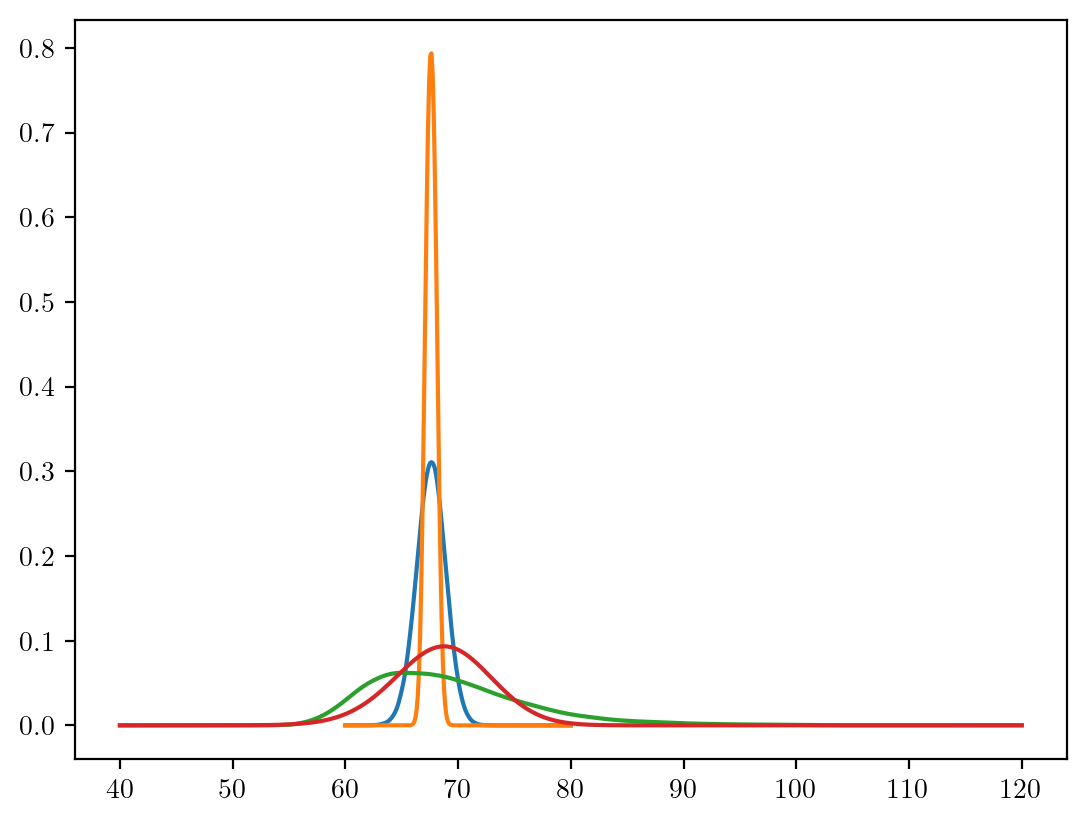

In [6]:
plt.plot(H0_arr_XG,pH0_XG)
plt.plot(H0_arr_XG,pH0_XG_Om0prior)
plt.plot(H0_w0wa_arr_XG,pH0_w0wa_XG)
plt.plot(H0_w0wa_arr_XG,pH0_w0wa_XG_Om0prior)

In [5]:
mid = (1-con_int.lower_level/con_int.map + con_int.upper_level/con_int.map-1)/2
mid_O6 = (1-con_int_O6.lower_level/con_int_O6.map + con_int_O6.upper_level/con_int_O6.map-1)/2
mid_XG = (1-con_int_XG.lower_level/con_int_XG.map + con_int_XG.upper_level/con_int_XG.map-1)/2
mid_XG_Om0prior = (1-con_int_XG_Om0prior.lower_level/con_int_XG_Om0prior.map + con_int_XG_Om0prior.upper_level/con_int_XG_Om0prior.map-1)/2

mid_w0wa = (1-con_int_w0wa.lower_level/con_int_w0wa.map + con_int_w0wa.upper_level/con_int_w0wa.map-1)/2
mid_w0wa_O6 = (1-con_int_w0wa_O6.lower_level/con_int_w0wa_O6.map + con_int_w0wa_O6.upper_level/con_int_w0wa_O6.map-1)/2
mid_w0wa_XG = (1-con_int_w0wa_XG.lower_level/con_int_w0wa_XG.map + con_int_w0wa_XG.upper_level/con_int_w0wa_XG.map-1)/2
mid_w0wa_XG_Om0prior = (1-con_int_w0wa_XG_Om0prior.lower_level/con_int_w0wa_XG_Om0prior.map + con_int_w0wa_XG_Om0prior.upper_level/con_int_w0wa_XG_Om0prior.map-1)/2


In [7]:
1-con_int_w0wa_XG.lower_level/con_int_w0wa_XG.map, con_int_w0wa_XG.upper_level/con_int_w0wa_XG.map-1, mid_w0wa_XG

(0.04537007904417223, 0.03256124898328183, 0.03896566401372703)

In [10]:
con_int_w0wa_XG.upper_level/con_int_w0wa_XG.map-1-mid_w0wa_XG

-0.0064044150304451986

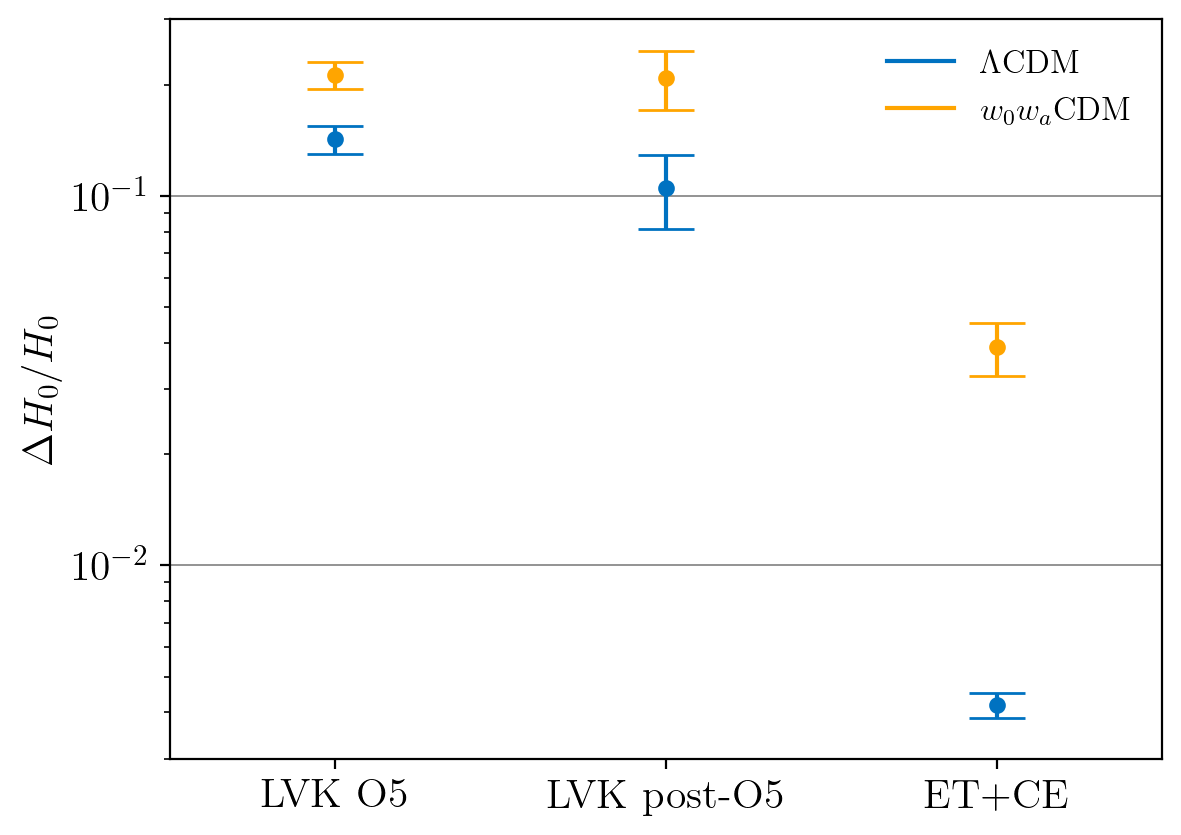

In [13]:
plt.rcParams.update({'font.size': 15})
# plt.figure(figsize=(6,4))
# plt.grid()
plt.axhline(1e-1, color='grey',linewidth=0.6)
plt.axhline(1e-2, color='grey',linewidth=0.6)
plt.errorbar(1, mid_w0wa, yerr=np.array([[mid_w0wa-1+con_int_w0wa.lower_level/con_int_w0wa.map],[con_int_w0wa.upper_level/con_int_w0wa.map-1-mid_w0wa]]), capsize=10, marker='.', markersize=10, color='orange')
plt.errorbar(2, mid_w0wa_O6, yerr=np.array([[mid_w0wa_O6-1+con_int_w0wa_O6.lower_level/con_int_w0wa_O6.map],[con_int_w0wa_O6.upper_level/con_int_w0wa_O6.map-1-mid_w0wa_O6]]), capsize=10, marker='.', markersize=10, color='orange')
plt.errorbar(3, mid_w0wa_XG, yerr=np.array([[np.abs(mid_w0wa_XG-1+con_int_w0wa_XG.lower_level/con_int_w0wa_XG.map)],[np.abs(con_int_w0wa_XG.upper_level/con_int_w0wa_XG.map-1-mid_w0wa_XG)]]), capsize=10, marker='.', markersize=10, color='orange')
# plt.errorbar(4, mid_w0wa_XG_Om0prior, yerr=np.array([[np.abs(mid_w0wa_XG_Om0prior-1+con_int_w0wa_XG_Om0prior.lower_level/con_int_w0wa_XG_Om0prior.map)],[np.abs(con_int_w0wa_XG_Om0prior.upper_level/con_int_w0wa_XG_Om0prior.map-1-mid_w0wa_XG_Om0prior)]]), capsize=10, marker='.', markersize=10, color='orange')
plt.errorbar(1, mid, yerr=np.array([[-(mid-1+con_int.lower_level/con_int.map)],[-(con_int.upper_level/con_int.map-1-mid)]]), capsize=10, marker='.', markersize=10, color='#0072C1')
plt.errorbar(2, mid_O6, yerr=np.array([[-(mid_O6-1+con_int_O6.lower_level/con_int_O6.map)],[-(con_int_O6.upper_level/con_int_O6.map-1-mid_O6)]]), capsize=10, marker='.', markersize=10, color='#0072C1')
plt.errorbar(3, mid_XG, yerr=np.array([[(mid_XG-1+con_int_XG.lower_level/con_int_XG.map)],[(con_int_XG.upper_level/con_int_XG.map-1-mid_XG)]]), capsize=10, marker='.', markersize=10, color='#0072C1')
# plt.errorbar(4, mid_XG_Om0prior, yerr=np.array([[(mid_XG_Om0prior-1+con_int_XG_Om0prior.lower_level/con_int_XG_Om0prior.map)],[(con_int_XG_Om0prior.upper_level/con_int_XG_Om0prior.map-1-mid_XG_Om0prior)]]), capsize=10, marker='.', markersize=10, color='#0072C1')

plt.yscale('log')
plt.xticks([1,2,3], ['LVK O5', 'LVK post-O5', 'ET+CE'])
# plt.xticks([1,2,3,4], ['LVK O5', 'LVK post-O5', 'ET+CE', r'ET+CE narrow $\Omega_{m,0}$ prior'], rotation=10)
plt.xlim(0.5,3.5)
plt.ylim(3e-3,3e-1)
plt.ylabel(r'$\Delta H_0/H_0$')
plt.plot(0,0, color='#0072C1', label=r'$\Lambda$CDM')
plt.plot(0,0, color='orange', label=r'$w_0w_a$CDM')
plt.legend(frameon=False,fontsize=12)
plt.savefig('../plots/fig_H0_error.png',dpi=600,bbox_inches='tight')

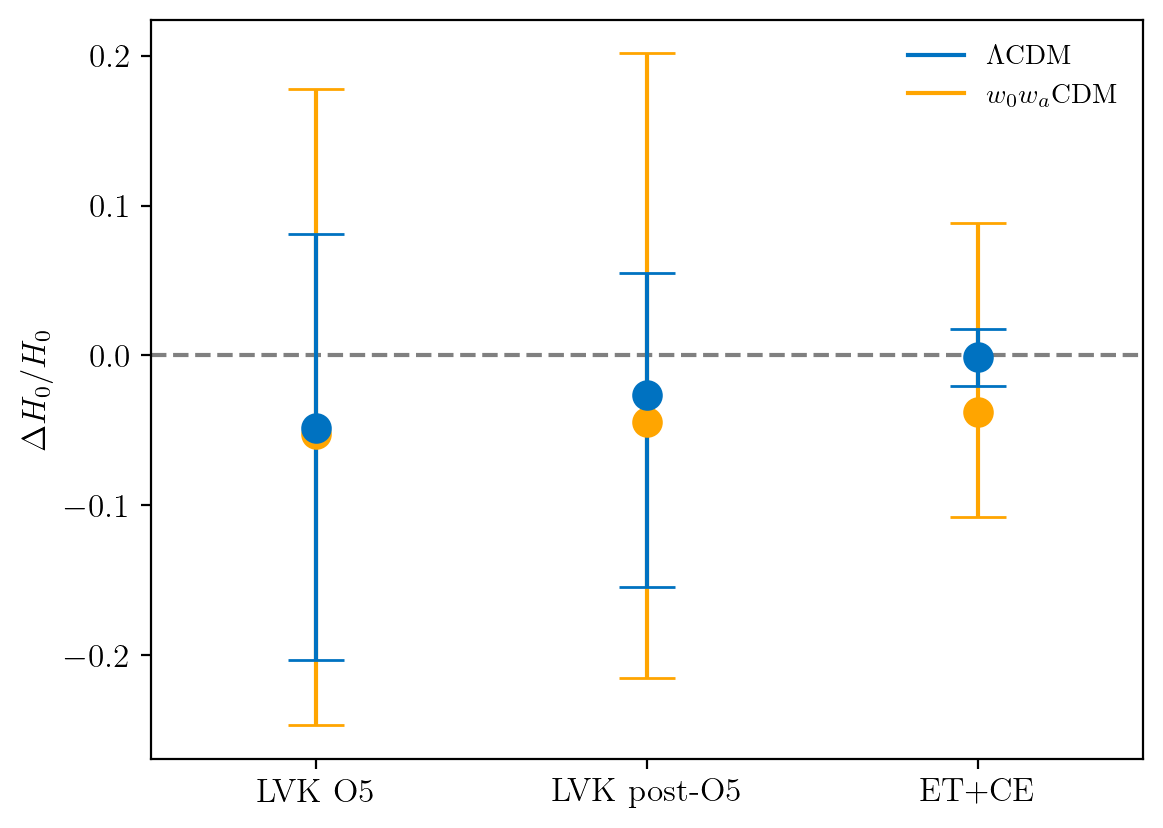

In [151]:
plt.axhline(color='grey',linestyle='--')
plt.errorbar(1, con_int_w0wa.map/67.7-1, yerr=np.array([[1-con_int_w0wa.lower_level/con_int_w0wa.map],[con_int_w0wa.upper_level/con_int_w0wa.map-1]]), capsize=10, marker='.', markersize=20, color='orange')
plt.errorbar(2, con_int_w0wa_O6.map/67.7-1, yerr=np.array([[1-con_int_w0wa_O6.lower_level/con_int_w0wa_O6.map],[con_int_w0wa_O6.upper_level/con_int_w0wa_O6.map-1]]), capsize=10, marker='.', markersize=20, color='orange')
plt.errorbar(3, con_int_w0wa_XG.map/67.7-1, yerr=np.array([[1-con_int_w0wa_XG.lower_level/con_int_w0wa_XG.map],[con_int_w0wa_XG.upper_level/con_int_w0wa_XG.map-1]]), capsize=10, marker='.', markersize=20, color='orange')
plt.errorbar(1, con_int.map/67.7-1, yerr=np.array([[1-con_int.lower_level/con_int.map],[con_int.upper_level/con_int.map-1]]), capsize=10, marker='.', markersize=20, color='#0072C1')
plt.errorbar(2, con_int_O6.map/67.7-1, yerr=np.array([[1-con_int_O6.lower_level/con_int_O6.map],[con_int_O6.upper_level/con_int_O6.map-1]]), capsize=10, marker='.', markersize=20, color='#0072C1')
plt.errorbar(3, con_int_XG.map/67.7-1, yerr=np.array([[1-con_int_XG.lower_level/con_int_XG.map],[con_int_XG.upper_level/con_int_XG.map-1]]), capsize=10, marker='.', markersize=20, color='#0072C1')

plt.xticks([1,2,3], ['LVK O5', 'LVK post-O5', 'ET+CE'])
plt.xlim(0.5,3.5)
# plt.ylim(-0.3,0.15)
plt.ylabel(r'$\Delta H_0/H_0$')
plt.plot(0,0, color='#0072C1', label=r'$\Lambda$CDM')
plt.plot(0,0, color='orange', label=r'$w_0w_a$CDM')
plt.legend(frameon=False,fontsize=10)

67.634 + 1.274 - 1.302
0.308 + 0.023 - 0.021


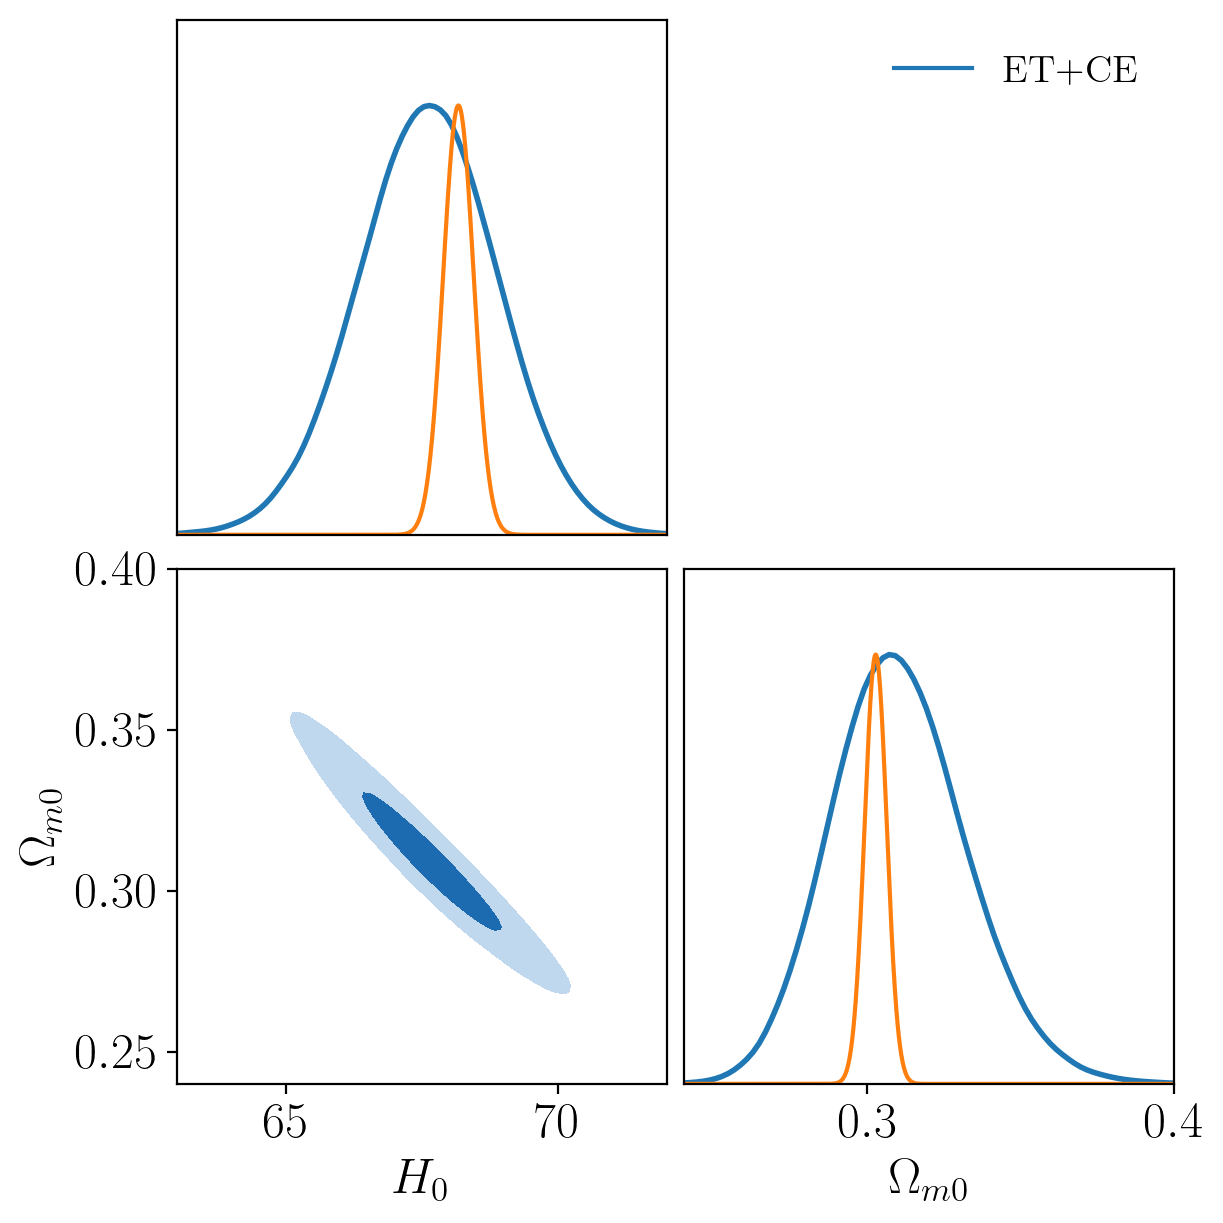

In [202]:
from scipy.stats import norm

H0 = 67.7
Om0 = 0.308
H0_arr_XG = np.linspace(60,80,200)
Om0_arr_XG = np.linspace(0.2,0.4,100)
param_values_XG = [H0_arr_XG,Om0_arr_XG]

ndim = 2
label = [r'$H_0$',r'$\Omega_{m0}$']
fig, ax = plt.subplots(ndim, ndim, figsize=[6,6],constrained_layout=True)
plt.rcParams.update({'font.size': 18})

for column in np.arange(0,ndim):
    for row in np.arange(0,ndim):
        indices = list(range(ndim))
        if column > row:
            if row!=0 or column!=1:
                fig.delaxes(ax[row][column])

        elif row == column:
            indices.remove(row)

            ind_lik_norm_avg_XG = np.loadtxt(f'average_lik_y_data/average_lik_1d_{row}_XG.txt')

            ax[row,column].plot(param_values_XG[row],ind_lik_norm_avg_XG/max(ind_lik_norm_avg_XG),linewidth=2)#,color='g')
            ax[row,column].set_ylim(0,1.2)

            con_int_XG = confidence_interval(ind_lik_norm_avg_XG, param_values_XG[row])
            print('%.3f + %.3f - %.3f'%(con_int_XG.map, con_int_XG.upper_level-con_int_XG.map, con_int_XG.map-con_int_XG.lower_level))

            ax[0,0].set_xlim(63,72)#(param_values[0][0],param_values[0][-1])
            ax[1,1].set_xlim(0.24,0.4)#param_values[1][-1])
            ax[row,column].set_yticks([])
            if column != 1:
                ax[row,column].set_xticks([])
            # else:
            #     ax[row,column].set_xticks([0.2,0.5,0.8])

        else:
            indices.remove(row)
            indices.remove(column)

            comb_likelihood_avg_XG = np.loadtxt(f'average_lik_y_data/average_lik_2d_XG.txt')
            
            ax[row,column].contourf(param_values_XG[column],param_values_XG[row],comb_likelihood_avg_XG.T,levels=(np.exp(-2)*np.max(comb_likelihood_avg_XG),np.exp(-0.5)*np.max(comb_likelihood_avg_XG),np.max(comb_likelihood_avg_XG)),cmap='Blues',alpha=1) #np.exp(-4.5)*np.max(comb_likelihood_avg), 
            ax[row,column].set_xlim(63,72)#(param_values[0][0],param_values[0][-1])
            ax[row,column].set_ylim(0.24,0.4)#param_values[1][-1])

        # ax[1,0].set_yticks([0.2,0.5,0.8])
        ax[1,1].set_xlabel(label[1])
        ax[1,0].set_xlabel(label[0])
        ax[1,0].set_ylabel(label[1])

H0_cmb = np.linspace(60,80,2000)
Om0_cmb = np.linspace(0.2,0.4,2000)
pH0_cmb = norm.pdf(H0_cmb, loc=68.17, scale=0.28)
pOm0_cmb = norm.pdf(Om0_cmb, loc=0.3027, scale=0.0036)

ax[0,0].plot(H0_cmb, pH0_cmb/max(pH0_cmb))
ax[1,1].plot(Om0_cmb, pOm0_cmb/max(pOm0_cmb))

ax[0,1].set_frame_on(False)
ax[0,1].plot(0.1, 0.1, label='ET+CE')
ax[0,1].axis('off')
ax[0,1].legend(frameon=False, fontsize=14)

# plt.savefig(f'../plots/emcee_h0_Om0_combine_averaged_new.png',dpi=600)


In [204]:
def gaussian_filter(kernel_size, sigma=1, muu=0):
   x, y = np.meshgrid(
       np.linspace(-1, 1, kernel_size),
       np.linspace(-1, 1, kernel_size)
   )
   dst = np.sqrt(x**2 + y**2)
   normal = 1 / (2 * np.pi * sigma**2)
   gauss = np.exp(-((dst - muu)**2 / (2.0 * sigma**2))) * normal
   return gauss


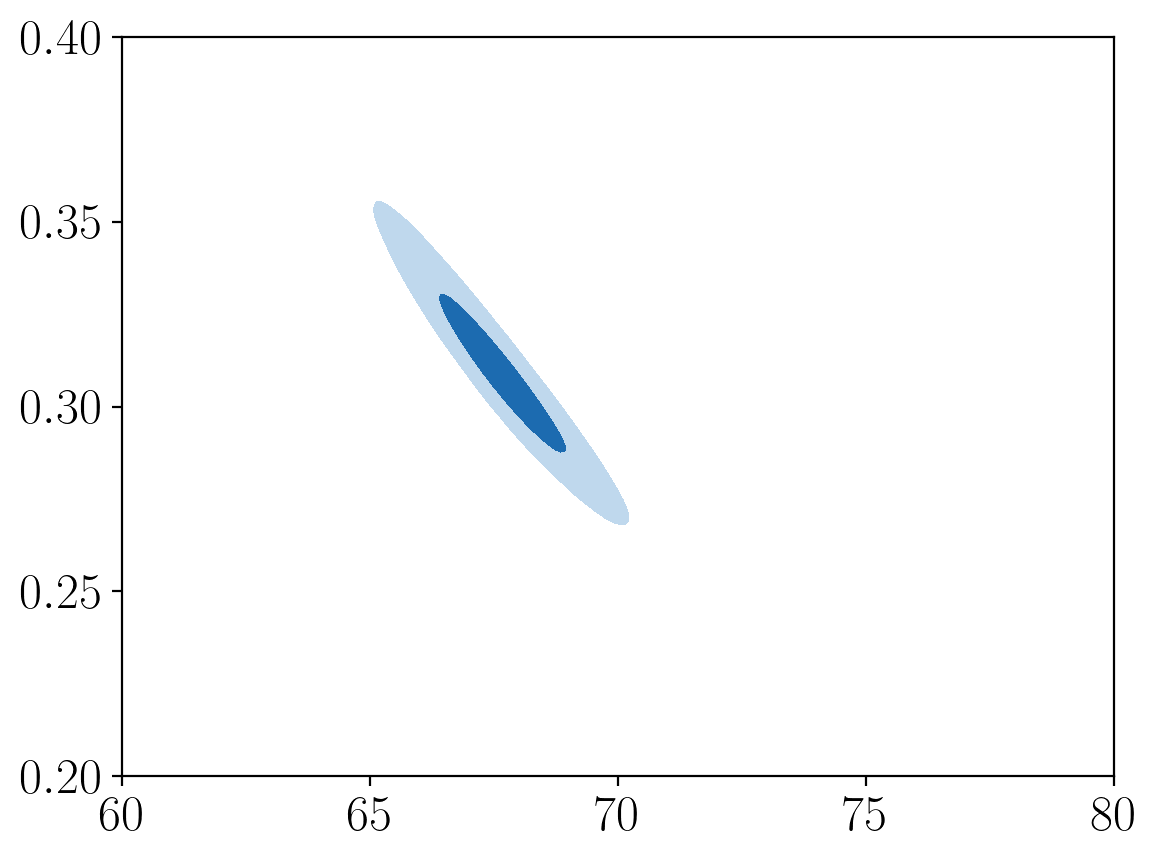

In [203]:
comb_likelihood_avg_XG = np.loadtxt(f'average_lik_y_data/average_lik_2d_XG.txt')
plt.contourf(param_values_XG[0],param_values_XG[1],comb_likelihood_avg_XG.T,levels=(np.exp(-2)*np.max(comb_likelihood_avg_XG),np.exp(-0.5)*np.max(comb_likelihood_avg_XG),np.max(comb_likelihood_avg_XG)),cmap='Blues',alpha=1) #np.exp(-4.5)*np.max(comb_likelihood_avg), 
plt.contourf(H0_cmb,Om0_cmb,gaussian_filter(kernel_size, sigma=1, muu=0),levels=(np.exp(-2)*np.max(comb_likelihood_avg_XG),np.exp(-0.5)*np.max(comb_likelihood_avg_XG),np.max(comb_likelihood_avg_XG)),cmap='Blues',alpha=1) #np.exp(-4.5)*np.max(comb_likelihood_avg), 


In [9]:
from scipy.stats import norm
from scipy.integrate import trapezoid

In [ ]:
ind_lik_norm_avg = np.loadtxt(f'average_lik_y_data/average_lik_1d_0.txt')


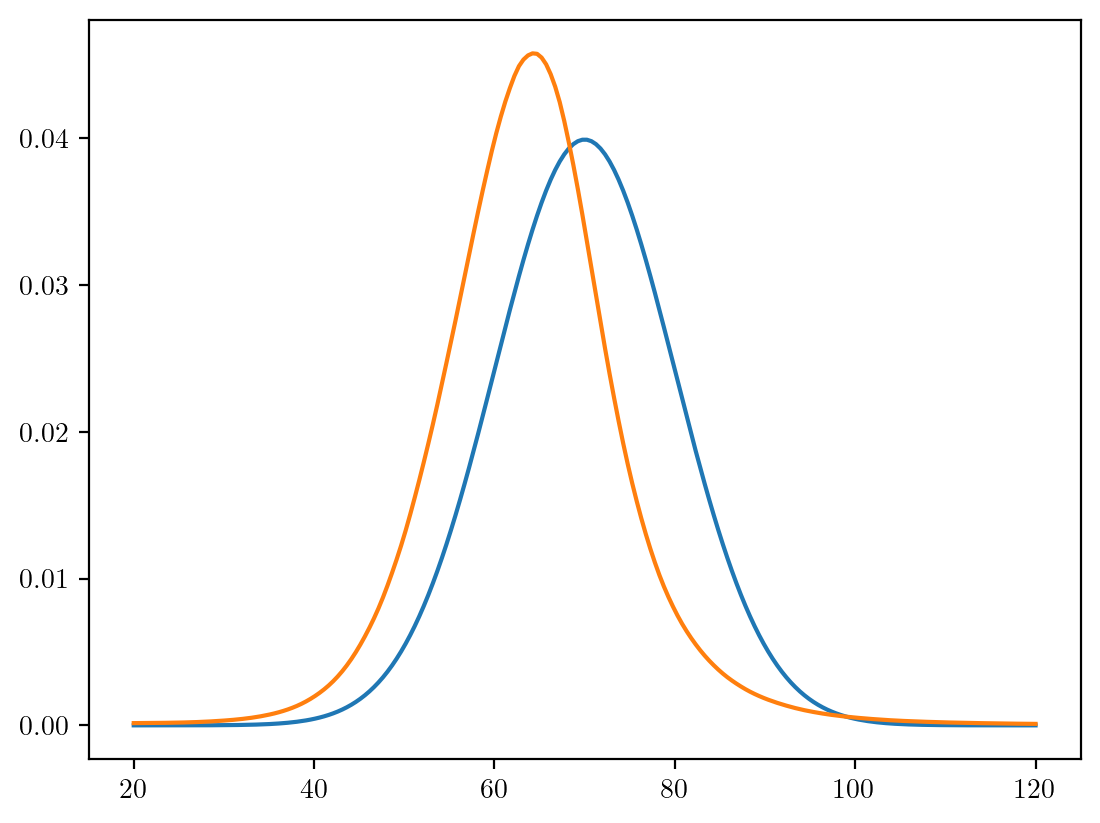

In [16]:
H0_arr = np.linspace(20,120,200)
plt.plot(H0_arr, norm(70,10).pdf(H0_arr))
plt.plot(H0_arr, ind_lik_norm_avg)

In [10]:
trapezoid(ind_lik_norm_avg*norm(70,10).pdf(H0_arr), H0_arr)

0.02593972304179984

In [17]:
trapezoid(ind_lik_norm_avg*norm(65,10).pdf(H0_arr), H0_arr)/trapezoid(ind_lik_norm_avg*norm(70,10).pdf(H0_arr), H0_arr)

1.1134012209328366